<a href="https://colab.research.google.com/github/uomodellamansarda/DisneyMoviesAnalysis/blob/main/DisneyRevenuesStreamsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook I analyzed the following dataset: 

https://data.world/kgarrett/disney-character-success-00-16

The dataset stores Disney characters, box office success & annual gross income. 

I made a first work evaluating if the dataset was missing relevant information or if between the three source there was any inconsistency . 

After this assessment, after I determinated the level of uncertainty related to the missing information, I identified the top 10 best selling films and the top 10 best selling directors and plotted.

It is very important to highlight that authors of the dataset do not explain how inflation adjusted gross is computed and which value was used.

In [1]:
#importing the libraries 
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 5)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
#the url where the data are located 
url1="https://raw.githubusercontent.com/uomodellamansarda/DisneyMoviesAnalysis/main/disney_revenue_stream2016_2019.csv"
url2="https://raw.githubusercontent.com/uomodellamansarda/DisneyMoviesAnalysis/main/disney_revenue_1991-2016.csv"
#disney_corporation_revenue_1991-2016.csv
#this dataframe contains movie+tv_network+Parks_Resorts+consumer_product_sales+interactive+videogames
#it's important to highlight that in 2015 and 2019 
#The Walt Disney Company Reports
df1=pd.read_csv(url1)
#disney_corporation_revenue_1991-2016.csv
#this dataframe contains movie+tv_network+Parks_Resorts+consumer_product_sales+interactive+videogames
df2=pd.read_csv(url2)

In [3]:
#getting some information to understand 
#what kind of data cleaning work 
#I need to do
print('df1 info')
print(df1.info())
print('df2 info')
print(df2.info())


print('df1 head')
print(df1.head())
print('df2 head')
print(df2.head())

df1 info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10 non-null     object 
 1   2016        5 non-null      float64
 2   2017        5 non-null      float64
 3   2018        5 non-null      float64
 4   2019        6 non-null      float64
dtypes: float64(4), object(1)
memory usage: 528.0+ bytes
None
df2 info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             26 non-null     int64  
 1   Studio Entertainment[NI 1]       25 non-null     float64
 2   Disney Consumer Products[NI 2]   24 non-null     float64
 3   Disney Interactive[NI 3][Rev 1]  12 non-null     float64
 4   Walt Disney Parks and Resorts    26 non-null     floa

From this inspection I noticed that total_gross and inflation_adjusted_gross should be float and not object

In [4]:
#after an inspection we saw that we had to strip a comma 
df2['Disney Media Networks'][df2['Year']==1996]=4142


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
df2['Disney Media Networks']= df2['Disney Media Networks'].replace(',', '')
df2['Disney Media Networks']= df2['Disney Media Networks'].astype(float)
print("1996  Park and media info")
print(df2[["Walt Disney Parks and Resorts", 'Disney Media Networks']][df2['Year']==1996])
print(df2[["Walt Disney Parks and Resorts", 'Disney Media Networks']][df2['Year']==1996].info())
print(type(df2['Disney Media Networks'][df2['Year']==1996].values))
print(df2['Disney Media Networks'][df2['Year']==1996])
print(df2['Disney Media Networks'].isna().sum())
print(df2)

1996  Park and media info
   Walt Disney Parks and Resorts  Disney Media Networks
5                         4502.0                 4142.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 5 to 5
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Walt Disney Parks and Resorts  1 non-null      float64
 1   Disney Media Networks          1 non-null      float64
dtypes: float64(2)
memory usage: 24.0 bytes
None
<class 'numpy.ndarray'>
5    4142.0
Name: Disney Media Networks, dtype: float64
3
    Year  Studio Entertainment[NI 1]  ...  Disney Media Networks  Total
0   1991                      2593.0  ...                    NaN   6111
1   1992                      3115.0  ...                    NaN   7502
2   1993                      3673.4  ...                    NaN   8529
3   1994                      4793.0  ...                  359.0  10414
4   1995                      6

In [6]:
#we have to fill the Nan with 0

df1=df1.fillna(0)
df2=df2.fillna(0)
#then we have to transpose the dataframe
df1_t=df1.T
df2_t=df2.T
print(df2_t.head())

print('Df1 Transpose Head')
print(df1_t)
print(df1_t.values[1:])

print('Df2 Transpose Head')
print(df2_t.head())

                                     0       1   ...       24       25
Year                             1991.0  1992.0  ...   2015.0   2016.0
Studio Entertainment[NI 1]       2593.0  3115.0  ...   7366.0   9441.0
Disney Consumer Products[NI 2]    724.0  1081.0  ...   4499.0      0.0
Disney Interactive[NI 3][Rev 1]     0.0     0.0  ...   1174.0      0.0
Walt Disney Parks and Resorts    2794.0  3306.0  ...  16162.0  16974.0

[5 rows x 26 columns]
Df1 Transpose Head
                                     0                               1  ...  \
Unnamed: 0  Studio Entertainment[NI 1]  Disney Consumer Products[NI 2]  ...   
2016                              9441                               0  ...   
2017                              8379                               0  ...   
2018                              9987                               0  ...   
2019                             11127                               0  ...   

                      8      9  
Unnamed: 0  Elimination 

In [7]:
#we create a new dataframe in order to clean the old one
new_index=df1.columns[1:].astype(int)
print(new_index)
new_columns=df1.iloc[:,0]
print(new_columns)
df_1_restored=pd.DataFrame(data=df1_t.values[1:],index=new_index,columns=new_columns)
df_1_restored = df_1_restored.rename_axis(index='Year',columns='Revenue Stream')
print(df_1_restored)

Int64Index([2016, 2017, 2018, 2019], dtype='int64')
0               Studio Entertainment[NI 1]
1           Disney Consumer Products[NI 2]
2          Disney Interactive[NI 3][Rev 1]
3    Consumer Products & Interactive Media
4            Walt Disney Parks and Resorts
5          Parks, Experiences and Products
6                    Disney Media Networks
7       Direct-to-Consumer & International
8                              Elimination
9                                    Total
Name: Unnamed: 0, dtype: object
Revenue Stream Studio Entertainment[NI 1] Disney Consumer Products[NI 2]  ...  \
Year                                                                      ...   
2016                                 9441                              0  ...   
2017                                 8379                              0  ...   
2018                                 9987                              0  ...   
2019                                11127                              0  ...   


In [8]:
new_columns=df2.iloc[:,1:].columns
new_index=df2.iloc[:-1,0]

new_values=df2.values[:-1,1:]
print("Printing new values")
print(new_values)
print(len(new_values))
print(new_values.shape)
print("New Columns Shape")
print(new_columns.shape)
print("new_index shape")
print(new_index.shape)
df_2_restored=pd.DataFrame(data=new_values,columns=new_columns,index=new_index)
print("Printing Df2 Restored head and info")
print(df_2_restored.tail())
print(df_2_restored.info())

Printing new values
[[ 2593.    724.      0.   2794.      0.   6111. ]
 [ 3115.   1081.      0.   3306.      0.   7502. ]
 [ 3673.4  1415.1     0.   3440.7     0.   8529. ]
 [ 4793.   1798.2     0.   3463.6   359.  10414. ]
 [ 6001.5  2150.      0.   3959.8   414.  12525. ]
 [    0.      0.      0.   4502.   4142.  18739. ]
 [ 6981.   3782.    174.   5014.   6522.  22473. ]
 [ 6849.   3193.    260.   5532.   7142.  22976. ]
 [ 6548.   3030.    206.   6106.   7512.  23402. ]
 [ 5994.   2602.    368.   6803.   9615.  25402. ]
 [ 7004.   2590.      0.   6009.   9569.  25790. ]
 [ 6465.   2440.      0.   6691.   9733.  25360. ]
 [ 7364.   2344.      0.   6412.  10941.  27061. ]
 [ 8713.   2511.      0.   7750.  11778.  30752. ]
 [ 7587.   2127.      0.   9023.  13207.  31944. ]
 [ 7529.   2193.      0.   9925.  14368.  34285. ]
 [ 7491.   2347.      0.  10626.  15046.  35510. ]
 [ 7348.   2415.    719.  11504.  15857.  37843. ]
 [ 6136.   2425.    712.  10667.  16209.  36149. ]
 [ 6701.   

In [9]:
df_2_restored=df_2_restored.apply(lambda x: pd.to_numeric(x,errors="coerce") if x.dtype == "object" else x)
print(df_2_restored.head(7))
print(df_2_restored.tail())
print(df_2_restored.info())
print("We want to understand why Disney Media Networks is not a number and then change with 0")
print("Filtering the object")
df2_filter=df_2_restored[df_2_restored["Disney Media Networks"].isnull()]
print(df2_filter)
df_2_restored=df_2_restored.fillna(0)
print("Df2 Restored Info")
print(df_2_restored.info())
#we do the same with df_1_restored
df_1_restored=df_1_restored.apply(lambda x: pd.to_numeric(x,errors="coerce") if x.dtype == "object" else x)
df_1_restored=df_1_restored.fillna(0)
#understanding df_1_restored and df_2_restored index datatype
print(type(df_1_restored.index))
print(df_1_restored.index.dtype)
print(type(df_2_restored.index))
print(df_2_restored.index.dtype)

      Studio Entertainment[NI 1]  Disney Consumer Products[NI 2]  ...  \
Year                                                              ...   
1991                      2593.0                           724.0  ...   
1992                      3115.0                          1081.0  ...   
1993                      3673.4                          1415.1  ...   
1994                      4793.0                          1798.2  ...   
1995                      6001.5                          2150.0  ...   
1996                         0.0                             0.0  ...   
1997                      6981.0                          3782.0  ...   

      Disney Media Networks    Total  
Year                                  
1991                    0.0   6111.0  
1992                    0.0   7502.0  
1993                    0.0   8529.0  
1994                  359.0  10414.0  
1995                  414.0  12525.0  
1996                 4142.0  18739.0  
1997                 6522.0  2

In [10]:
df_merge=df_1_restored.merge(df_2_restored, how='outer',right_index=True,left_index=True)
print(df_merge.info())
print(df_merge.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 1991 to 2019
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Studio Entertainment[NI 1]_x           4 non-null      float64
 1   Disney Consumer Products[NI 2]_x       4 non-null      float64
 2   Disney Interactive[NI 3][Rev 1]_x      4 non-null      float64
 3   Consumer Products & Interactive Media  4 non-null      float64
 4   Walt Disney Parks and Resorts_x        4 non-null      float64
 5   Parks, Experiences and Products        4 non-null      float64
 6   Disney Media Networks_x                4 non-null      float64
 7   Direct-to-Consumer & International     4 non-null      float64
 8   Elimination                            4 non-null      float64
 9   Total_x                                4 non-null      float64
 10  Studio Entertainment[NI 1]_y           25 non-null     float64
 11  Dis

In [11]:
#second attemp on merging
df_merge_2=pd.concat([df_1_restored,df_2_restored])


In [12]:
print(df_merge_2.tail(12))
print(df_merge_2.info())


      Studio Entertainment[NI 1]  Disney Consumer Products[NI 2]  ...  \
Year                                                              ...   
2004                      8713.0                          2511.0  ...   
2005                      7587.0                          2127.0  ...   
2006                      7529.0                          2193.0  ...   
2007                      7491.0                          2347.0  ...   
2008                      7348.0                          2415.0  ...   
2009                      6136.0                          2425.0  ...   
2010                      6701.0                          2678.0  ...   
2011                      6351.0                          3049.0  ...   
2012                      5825.0                          3252.0  ...   
2013                      5979.0                          3555.0  ...   
2014                      7278.0                          3985.0  ...   
2015                      7366.0                   

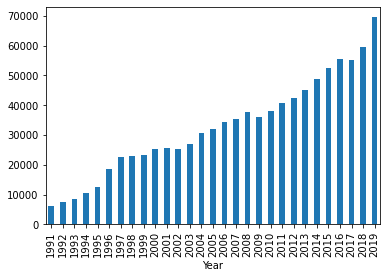

In [13]:
df_merge_2['Total'].sort_index().plot(kind='bar')

[1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019]


<BarContainer object of 29 artists>

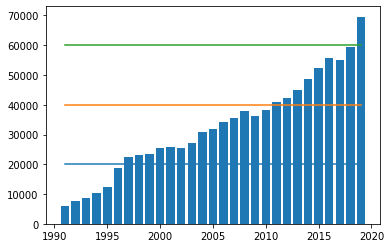

In [14]:
x1=20000
x2=40000
x3=60000
y_range=np.arange(1991,2020)
y1=np.full(len(y_range),x1)
y2=np.full(len(y_range),x2)
y3=np.full(len(y_range),x3)
print(y_range)
fig,ax=plt.subplots()
ax.plot(y_range,y1)
ax.plot(y_range,y2)
ax.plot(y_range,y3)
ax.bar(y_range,df_merge_2['Total'].sort_index())

In [15]:
print(df_merge_2.columns)

Index(['Studio Entertainment[NI 1]', 'Disney Consumer Products[NI 2]',
       'Disney Interactive[NI 3][Rev 1]',
       'Consumer Products & Interactive Media',
       'Walt Disney Parks and Resorts', 'Parks, Experiences and Products',
       'Disney Media Networks', 'Direct-to-Consumer & International',
       'Elimination', 'Total'],
      dtype='object')


In [28]:
a='Studio Entertainment[NI 1]'
b='Walt Disney Parks and Resorts'
c='Parks, Experiences and Products'
d='Disney Media Networks'
relevant_sum=df_merge_2[[a,b,c,d]].sort_index().sum(axis=1)
relevant_diff=relevant_sum-df_merge_2['Total']
diff_perc=((relevant_sum-df_merge_2['Total'])/df_merge_2['Total']*100).round(2)
print(diff_perc)
print(type(relevant_sum))
print(relevant_sum)
print(sum(relevant_diff>0))
print(df_merge_2[[a,b,c,d]].loc[1996])

Year
1991   -11.85
1992   -14.41
1993   -16.59
1994   -17.27
1995   -17.16
1996   -53.87
1997   -17.60
1998   -15.03
1999   -13.83
2000   -11.77
2001   -12.44
2002    -9.74
2003    -8.66
2004    -8.17
2005    -6.66
2006    -7.18
2007    -6.61
2008    -8.28
2009    -8.68
2010    -9.04
2011    -9.86
2012    -9.69
2013   -10.26
2014   -10.82
2015   -10.81
2016    -9.94
2017    -8.77
2018    -8.17
2019   -10.62
dtype: float64
<class 'pandas.core.series.Series'>
Year
1991     5387.0
1992     6421.0
1993     7114.1
1994     8615.6
1995    10375.3
1996     8644.0
1997    18517.0
1998    19523.0
1999    20166.0
2000    22412.0
2001    22582.0
2002    22889.0
2003    24717.0
2004    28241.0
2005    29817.0
2006    31822.0
2007    33163.0
2008    34709.0
2009    33012.0
2010    34624.0
2011    36862.0
2012    38181.0
2013    40422.0
2014    43529.0
2015    46792.0
2016    50104.0
2017    50304.0
2018    54579.0
2019    62179.0
dtype: float64
0
Studio Entertainment[NI 1]            0.0
Walt Disne

In [17]:
df_merge_2.loc[1996]

Studio Entertainment[NI 1]                   0.0
Disney Consumer Products[NI 2]               0.0
Disney Interactive[NI 3][Rev 1]              0.0
Consumer Products & Interactive Media        NaN
Walt Disney Parks and Resorts             4502.0
Parks, Experiences and Products              NaN
Disney Media Networks                     4142.0
Direct-to-Consumer & International           NaN
Elimination                                  NaN
Total                                    18739.0
Name: 1996, dtype: float64

In [18]:


df_merge_2=df_merge_2.fillna(0)
studio_entert=pd.DataFrame(df_merge_2['Studio Entertainment[NI 1]']).sort_index()
park_sum=df_merge_2['Walt Disney Parks and Resorts']+df_merge_2['Parks, Experiences and Products']
park_resort=pd.DataFrame(park_sum,columns=['park_resort']).sort_index()
disney_media_network=pd.DataFrame(df_merge_2['Disney Media Networks']).sort_index()

sub_total=df_merge_2['Studio Entertainment[NI 1]']+df_merge_2['Walt Disney Parks and Resorts']+df_merge_2['Parks, Experiences and Products']+disney_media_network#-df_merge_2['Total']
print(sub_total.sum())

studio_entert['Total']=df_merge_2['Total']
park_resort['Total']=df_merge_2['Total']
disney_media_network['Total']=df_merge_2['Total']

studio_entert['studio_p']=round(studio_entert['Studio Entertainment[NI 1]']/studio_entert['Total']*100,2)
studio_entert['complementary']=100-studio_entert['studio_p']
park_resort['park_p']=round(park_resort.iloc[:,0]/park_resort['Total']*100,2)
park_resort['complementary']=100-park_resort['park_p']

disney_media_network['media_p']=round(disney_media_network.iloc[:,0]/disney_media_network['Total']*100,2)
disney_media_network['complementary']=100-disney_media_network['media_p']
print(studio_entert.tail())
print(park_resort.tail())
print(park_resort.head())
print(disney_media_network.head())
print(disney_media_network.tail())
#disney_media_network=park_resort.assign(df_merge_2['Total'])

1991                     0.0
1992                     0.0
1993                     0.0
1994                     0.0
1995                     0.0
1996                     0.0
1997                     0.0
1998                     0.0
1999                     0.0
2000                     0.0
2001                     0.0
2002                     0.0
2003                     0.0
2004                     0.0
2005                     0.0
2006                     0.0
2007                     0.0
2008                     0.0
2009                     0.0
2010                     0.0
2011                     0.0
2012                     0.0
2013                     0.0
2014                     0.0
2015                     0.0
2016                     0.0
2017                     0.0
2018                     0.0
2019                     0.0
Disney Media Networks    0.0
dtype: float64
      Studio Entertainment[NI 1]    Total  studio_p  complementary
Year                                            

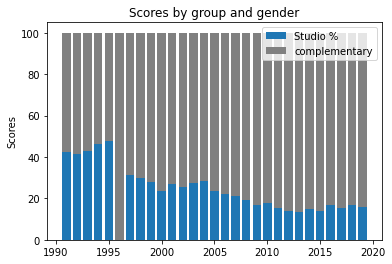

In [19]:
labels=studio_entert.index
first_stack=studio_entert['studio_p']
second_stack=studio_entert['complementary']
fig, ax = plt.subplots()

ax.bar(labels, first_stack, label='Studio %')
ax.bar(labels, second_stack,  color='grey', bottom=first_stack,
       label='complementary')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()


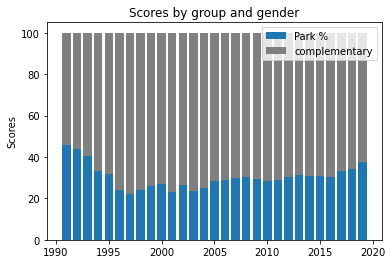

In [20]:
labels=park_resort['park_p'].index
first_stack=park_resort['park_p']
second_stack=park_resort['complementary']
fig, ax = plt.subplots()

ax.bar(labels, first_stack, label='Park %')
ax.bar(labels, second_stack,  color='grey', bottom=first_stack,
       label='complementary')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

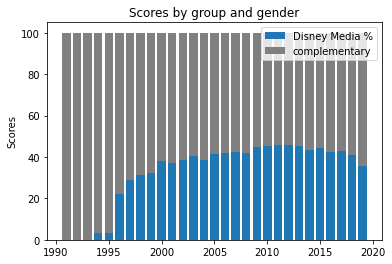

      Disney Media Networks    Total  media_p  complementary
Year                                                        
1991                    0.0   6111.0     0.00         100.00
1992                    0.0   7502.0     0.00         100.00
1993                    0.0   8529.0     0.00         100.00
1994                  359.0  10414.0     3.45          96.55
1995                  414.0  12525.0     3.31          96.69
1996                 4142.0  18739.0    22.10          77.90
1997                 6522.0  22473.0    29.02          70.98
1998                 7142.0  22976.0    31.08          68.92
1999                 7512.0  23402.0    32.10          67.90
2000                 9615.0  25402.0    37.85          62.15
2001                 9569.0  25790.0    37.10          62.90
2002                 9733.0  25360.0    38.38          61.62
2003                10941.0  27061.0    40.43          59.57
2004                11778.0  30752.0    38.30          61.70
2005                1320

In [21]:
labels=disney_media_network.index
first_stack=disney_media_network['media_p']
second_stack=disney_media_network['complementary']
fig, ax = plt.subplots()

ax.bar(labels, first_stack, label='Disney Media %')
ax.bar(labels, second_stack,  color='grey', bottom=first_stack,
       label='complementary')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()
print(disney_media_network)

In [22]:

labels=disney_media_network.index
first_stack=disney_media_network['media_p']
second_stack=disney_media_network['complementary']
def bar_plot(x1,y1,y2,y_2_label='Compared Variable',title="You Forgot The Title"):
  fig, ax = plt.subplots()
  ax.bar(x1, y1, label=y_2_label)
  ax.bar(x1, y2,  color='grey', bottom=first_stack,
       label='Other Revenue Streams')
  ax.set_ylabel('Revenues')
  ax.set_title(ti)
  ax.legend()
  plt.show()
  return
print(disney_media_network)

      Disney Media Networks    Total  media_p  complementary
Year                                                        
1991                    0.0   6111.0     0.00         100.00
1992                    0.0   7502.0     0.00         100.00
1993                    0.0   8529.0     0.00         100.00
1994                  359.0  10414.0     3.45          96.55
1995                  414.0  12525.0     3.31          96.69
1996                 4142.0  18739.0    22.10          77.90
1997                 6522.0  22473.0    29.02          70.98
1998                 7142.0  22976.0    31.08          68.92
1999                 7512.0  23402.0    32.10          67.90
2000                 9615.0  25402.0    37.85          62.15
2001                 9569.0  25790.0    37.10          62.90
2002                 9733.0  25360.0    38.38          61.62
2003                10941.0  27061.0    40.43          59.57
2004                11778.0  30752.0    38.30          61.70
2005                1320

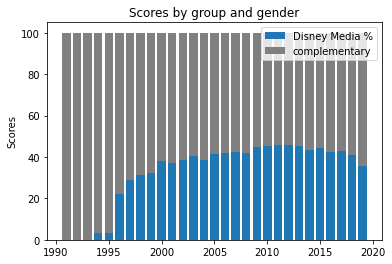

      Disney Media Networks    Total  media_p  complementary
Year                                                        
1991                    0.0   6111.0     0.00         100.00
1992                    0.0   7502.0     0.00         100.00
1993                    0.0   8529.0     0.00         100.00
1994                  359.0  10414.0     3.45          96.55
1995                  414.0  12525.0     3.31          96.69
1996                 4142.0  18739.0    22.10          77.90
1997                 6522.0  22473.0    29.02          70.98
1998                 7142.0  22976.0    31.08          68.92
1999                 7512.0  23402.0    32.10          67.90
2000                 9615.0  25402.0    37.85          62.15
2001                 9569.0  25790.0    37.10          62.90
2002                 9733.0  25360.0    38.38          61.62
2003                10941.0  27061.0    40.43          59.57
2004                11778.0  30752.0    38.30          61.70
2005                1320

In [61]:
def bar_plot(x1,y1,y2,y_2_label='Compared Variable',title="You Forgot The Title"):
  fig, ax = plt.subplots(figsize=(10,5),
                          facecolor='white', dpi=300)
  twenty=np.full(len(x1),20)
  forty=np.full(len(x1),40)

  ax.bar(x1, y1, label=y_2_label)
  ax.bar(x1, y2,  color='grey', bottom=y1,
       label='Other Revenue Streams')
  ax.set_ylabel('Revenues Contribution %')
  ax.plot(x1,twenty,'--',color='yellow')
  ax.plot(x1,forty,'--',color='red')
  ax.set_title(title)
  ax.legend()
  ax.yaxis.tick_left()
  ax.yaxis.set_ticks_position("both")
  water_x=(min(x1)+max(x1))/2
  water_y=max(y1)/3
  print(water_x)
  print(water_y)
  plt.text(water_x, water_y, 'Data Elaboration Ing. Andrea Ciufo. Data Source: https://data.world/',
          fontsize=10, color='gray',
          ha='center', va='top', alpha=0.5)
  plt.show()
  return

labels=disney_media_network.index
first_stack=disney_media_network['media_p']
second_stack=disney_media_network['complementary']
fig, ax = plt.subplots()

ax.bar(labels, first_stack, label='Disney Media %')
ax.bar(labels, second_stack,  color='grey', bottom=first_stack,
       label='complementary')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()
print(disney_media_network)  

2005.0
15.24


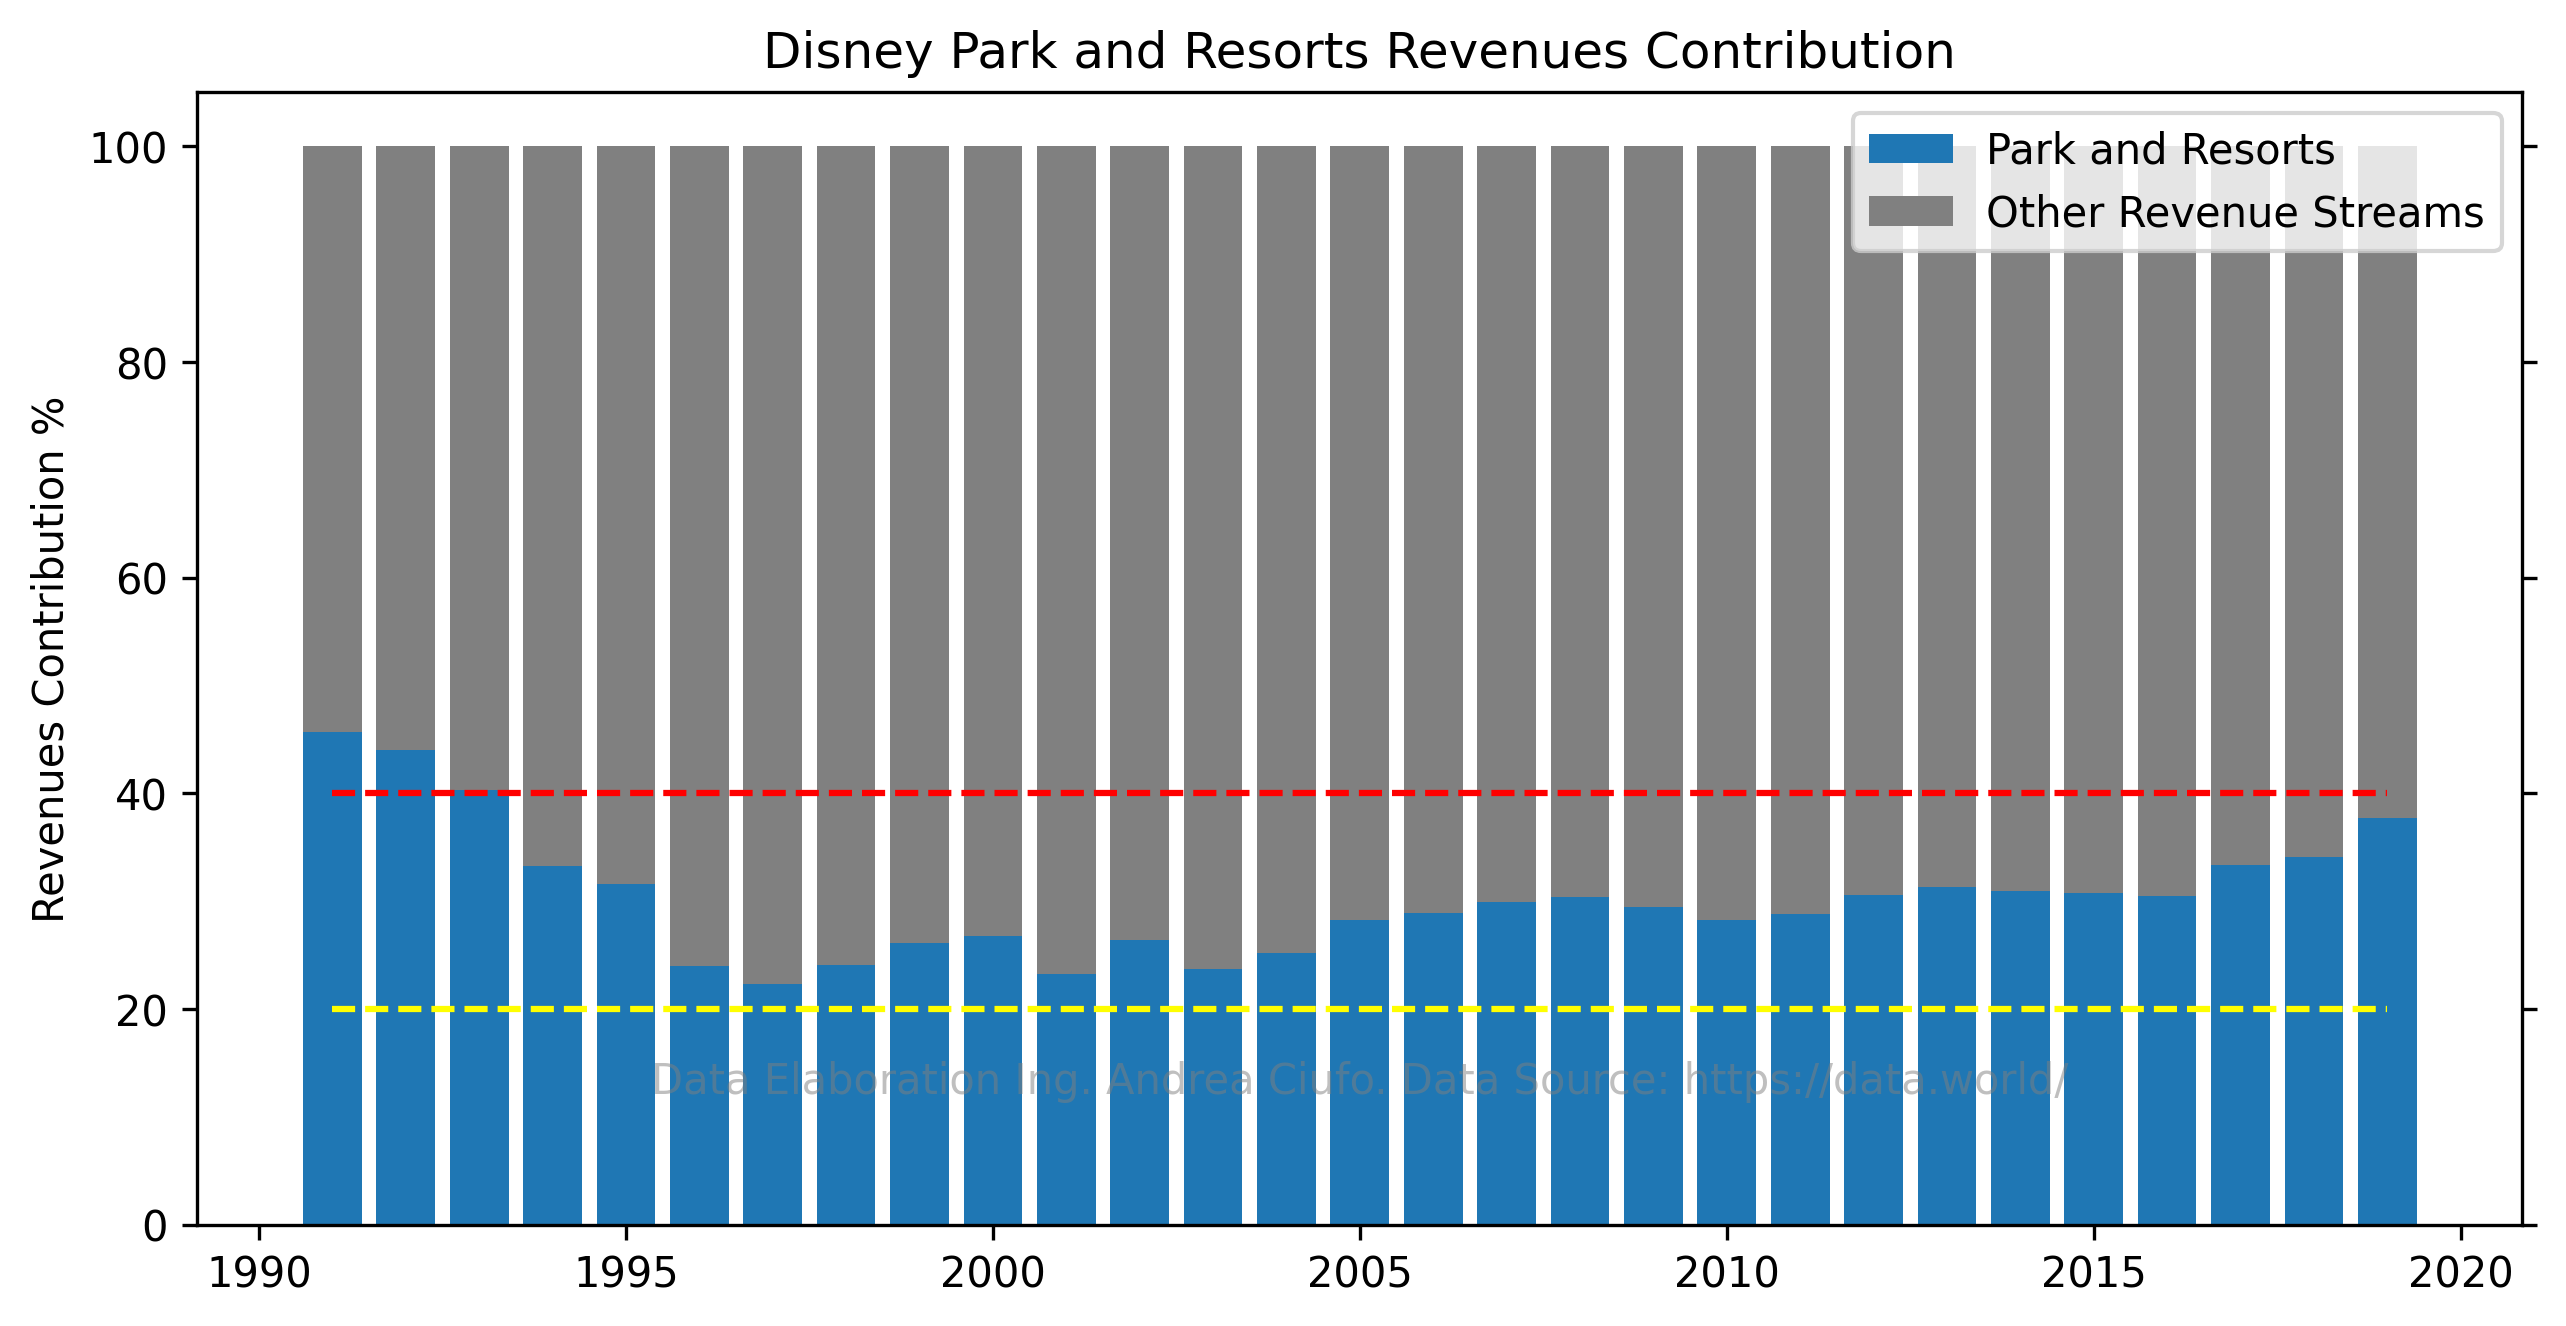

In [62]:
bar_plot(park_resort.index,park_resort['park_p'],
         park_resort['complementary'],y_2_label="Park and Resorts",
         title='Disney Park and Resorts Revenues Contribution')

2005.0
15.973333333333334


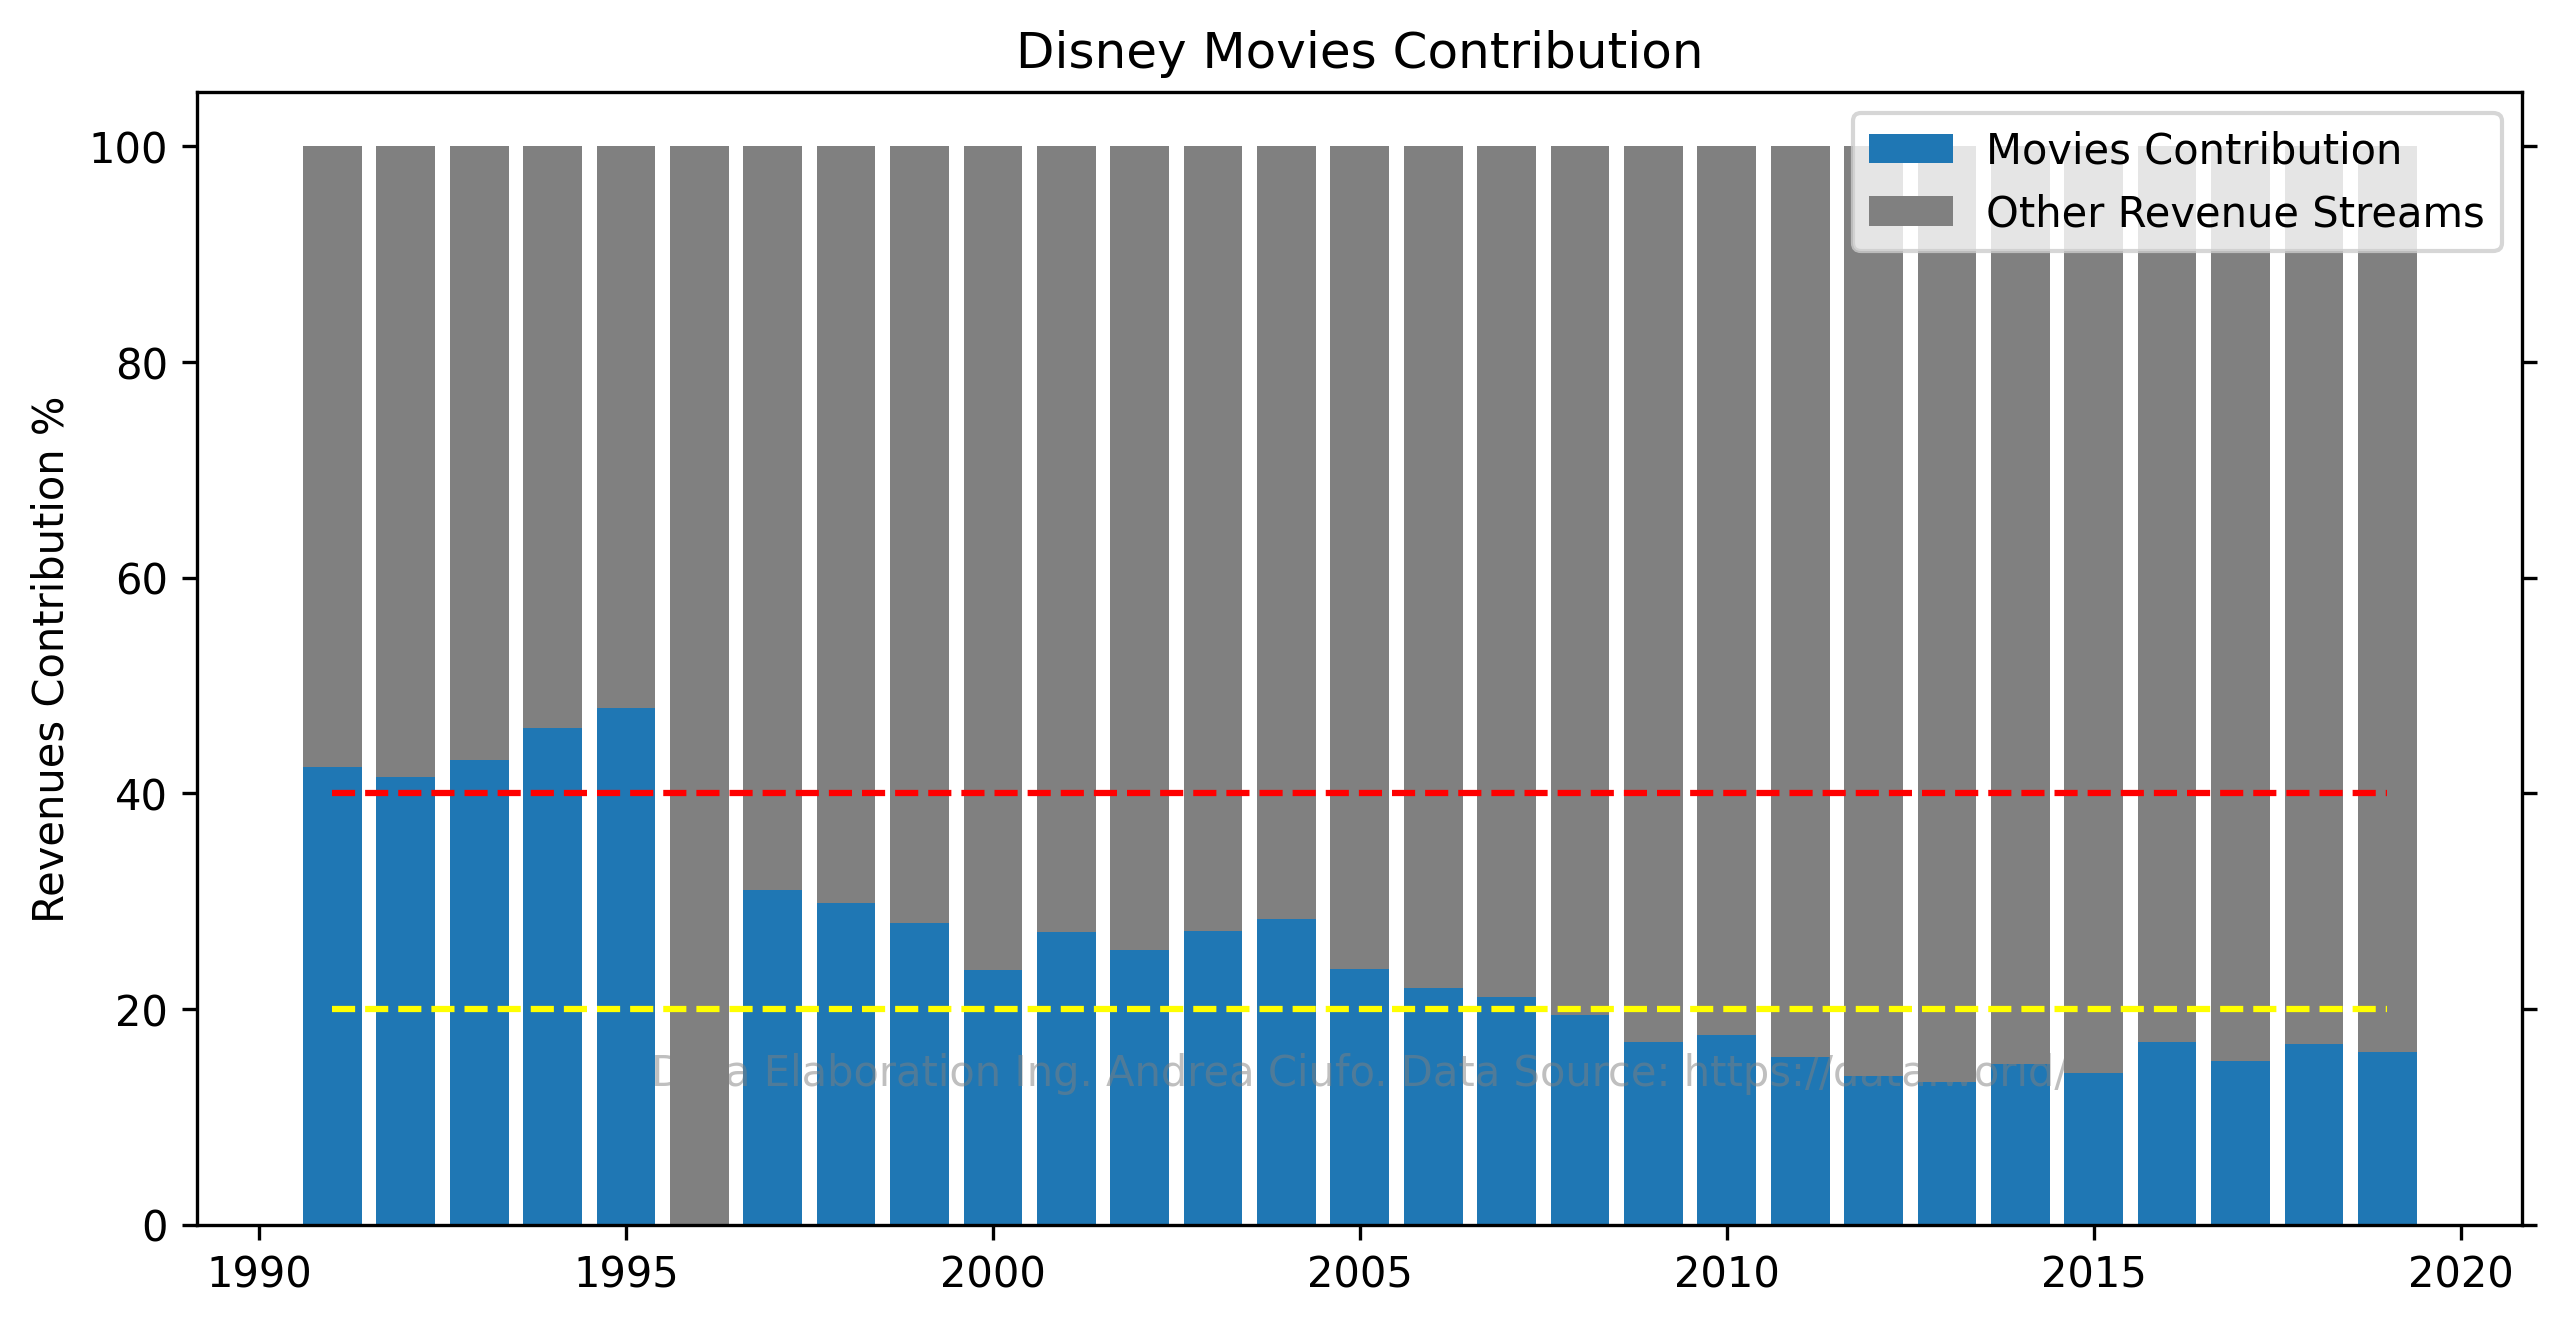

In [63]:

bar_plot(studio_entert.index,studio_entert['studio_p'],
         studio_entert['complementary'],y_2_label="Movies Contribution",
         title='Disney Movies Contribution')

2005.0
15.323333333333332


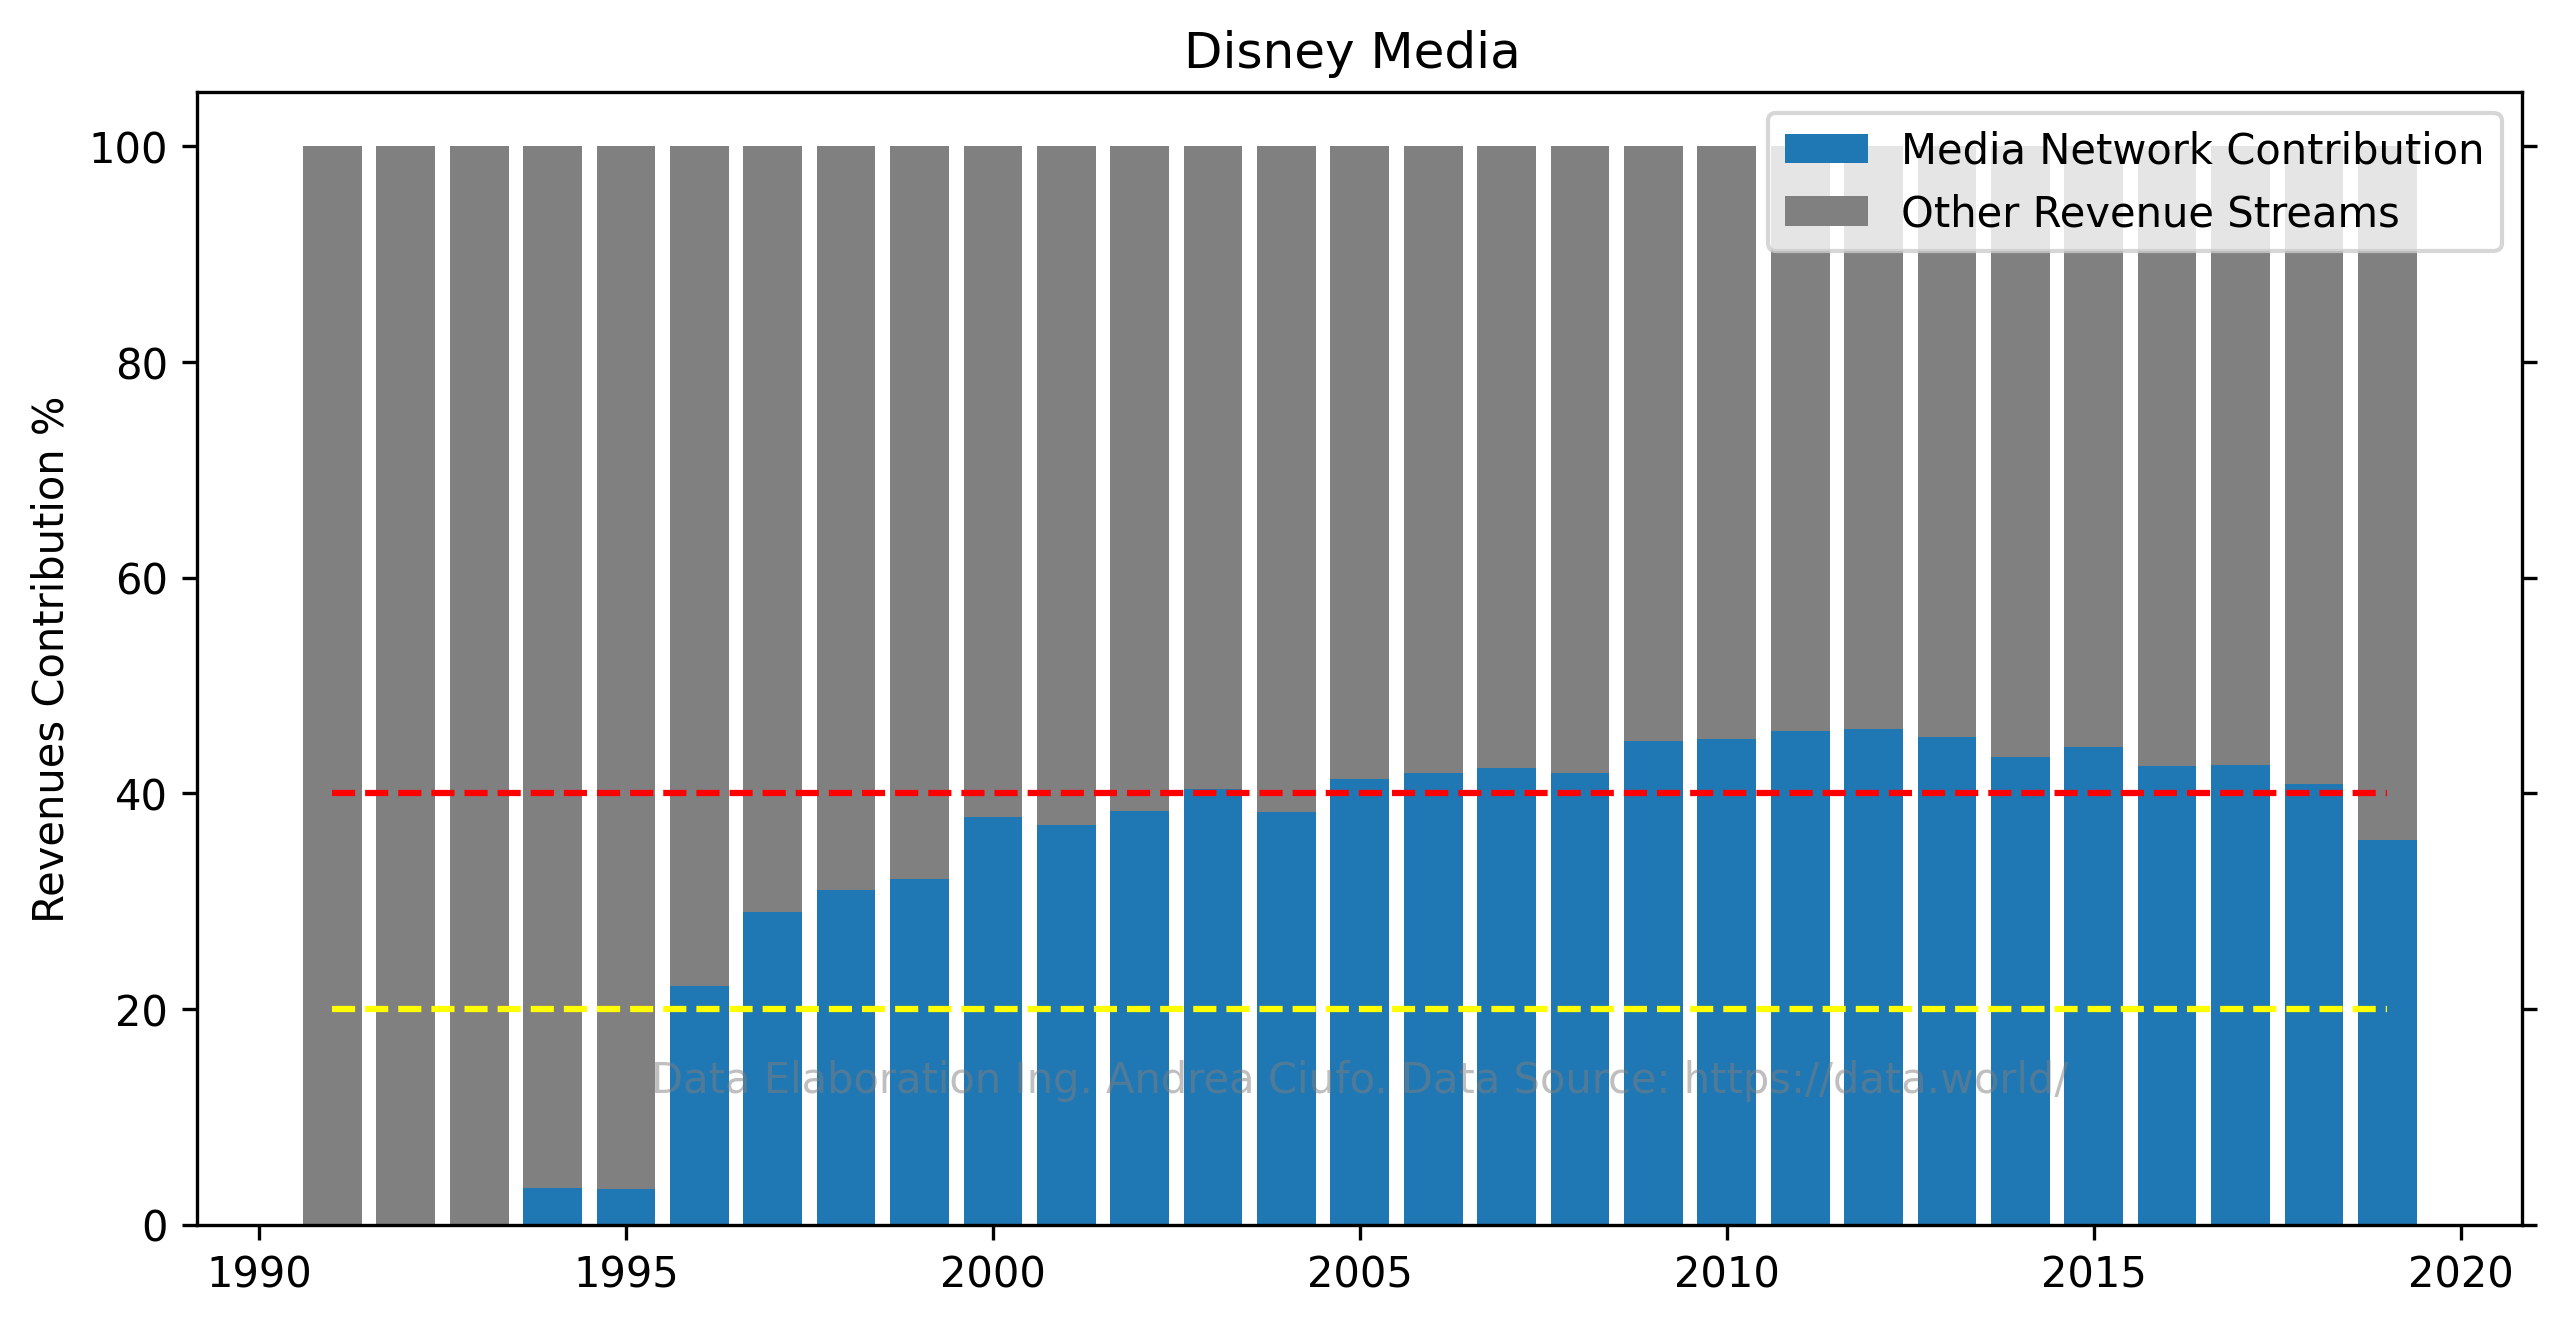

In [64]:
bar_plot(disney_media_network.index,disney_media_network['media_p'],
         disney_media_network['complementary'],y_2_label="Media Network Contribution",
         title='Disney Media ')